In [63]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [64]:
# loading the dataset
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# target variable
df["progression"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


- The target or dependent variable is **"progression"**
- The independent variables (features) are age , sex, bmi, bp and blood serum measurements S1-S6
- The goal is the predict the **"progression"** value using the independent variables

In [65]:
print(df.describe())

# check for missing values
print("\nMissing Values:\n", df.isnull().sum())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

- No missing values, all the features and target variables doesn't have any missing values
- Feature values are centered around zero, which states that the dataset is already standardised
- The target variable has mean~152, min:25, max:346, which indicated these values are widely distributed 

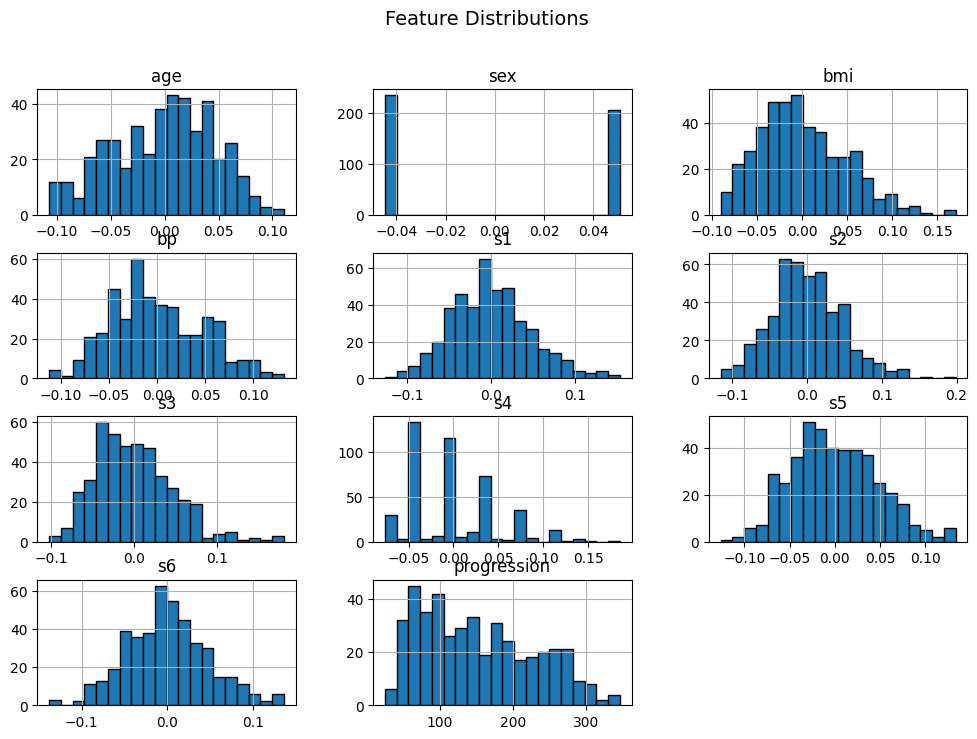

In [66]:
# Histograms, to check the distribution
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

- __'Age'__ is standardized, with values centered around zero
- __'Sex'__  has two unique values, ~0.0507 and ~-0.0446
- __'BMI'__  is also standardized
- __'bp'__ , standardized with a mean of zero
- __'S1-S6'__ , all standardized with means close to zero

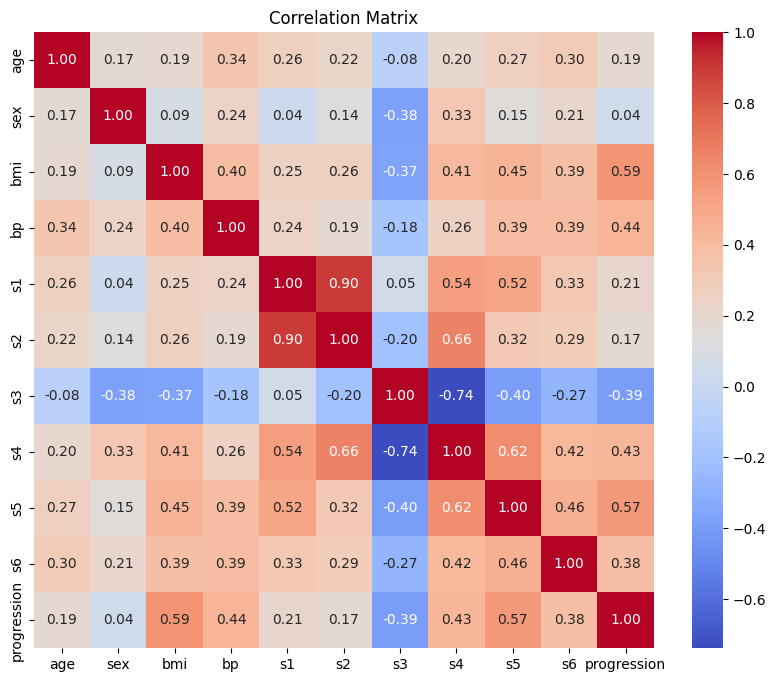

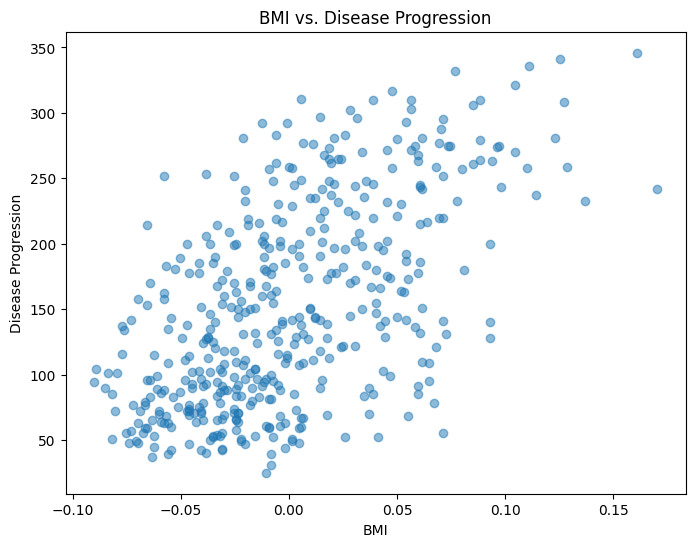

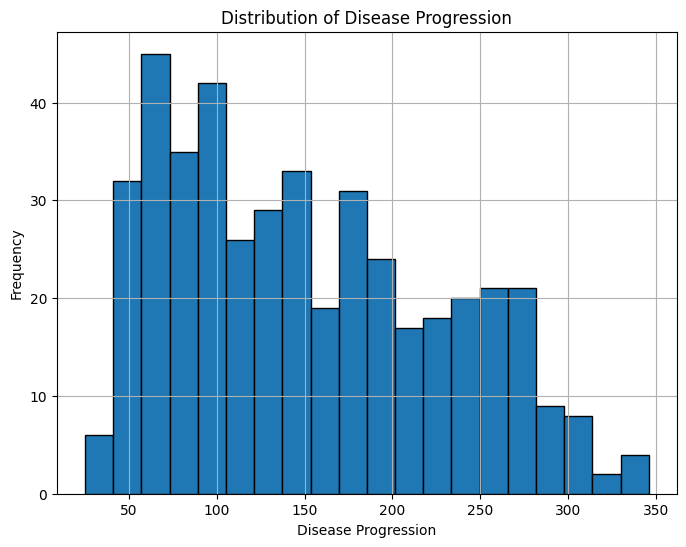

In [67]:
# correlation matrix
corr_matrix = df.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# scatter plot for target variable
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['progression'], alpha=0.5)
plt.title('BMI vs. Disease Progression')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.show()

# histogram for target variable
plt.figure(figsize=(8, 6))
df['progression'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Disease Progression')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

#### __Correlation matrix:__
- S5 Has the highest positive correlation with 'progression', suggesting higher values of S5 associated with increased disease progression
- S3 feature has negative correlation with 'progression'
- Some features are showing strong intercorrelations, like S1 and S2

#### __Scatter Plot:__
- BMI Vs disease progression, can observe a positive relationship, indicating high bmi may be associated with increased disease progression

#### __Histogram:__
- The target variable 'progression' is normally distributed approximately, with a slight right skew.

#### __Data Cleaning:__
- From the missing values check, we can see that there are no missing values in the dataset.
- The dataset is already standardized.
- As the data set is standardized, there is no concern for outliers.
- The target variable 'progression' is not standardized, but a close normal distribution is observed.

In [68]:
# Splitting dataset into Train, Test and validation
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="progression")
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

In [69]:
# BMI X , target y
X_train_bmi = X_train[['bmi']]
X_val_bmi = X_val[['bmi']]
X_test_bmi = X_test[['bmi']]


models = {}
train_predictions = {}
val_predictions = {}

# Training the polynomial regression models, degree 0-5
for degree in range(6):
    poly = PolynomialFeatures(degree=degree)  # generate polynomial features
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)

    model = LinearRegression()  
    model.fit(X_train_poly, y_train)  # model training
    models[degree] = (model, poly)

    # Predictions
    train_predictions[degree] = model.predict(X_train_poly)
    val_predictions[degree] = model.predict(X_val_poly)

In [70]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = []

for degree, (model, poly) in models.items():
    X_train_poly = poly.transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)
  
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)   
    results.append([degree, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val])

results_df = pd.DataFrame(results, columns=["Degree", "R² Train", "R² Val", "MAE Train", "MAE Val", "MAPE Train", "MAPE Val"])
print(results_df)

   Degree  R² Train    R² Val  MAE Train    MAE Val  MAPE Train   MAPE Val
0       0  0.000000 -0.106957  66.201641  66.057059   62.826669  71.263880
1       1  0.349672  0.331264  52.287739  47.208472   48.362886  47.060009
2       2  0.350764  0.331631  52.207314  47.213700   48.298534  47.239667
3       3  0.350774  0.331638  52.198968  47.185414   48.280744  47.222673
4       4  0.353014  0.340758  52.092653  46.090118   48.053266  46.050330
5       5  0.354100  0.349881  52.059191  45.462121   48.004022  45.175275


- Model with degree 5 has highest R² validation
- It also has the lowest MAE and MAPE
  
**Degree 5, is the best model based on validation performance**

In [71]:
X_test_poly = poly.transform(X_test_bmi) # transforming test data
y_test_pred = model.predict(X_test_poly) # predictions

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
print(f"Test Set Results:")
print(f"R²: {r2_test:.4f}")
print(f"MAE: {mae_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")

Test Set Results:
R²: 0.2667
MAE: 51.75
MAPE: 43.03%


C:\Users\imana\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


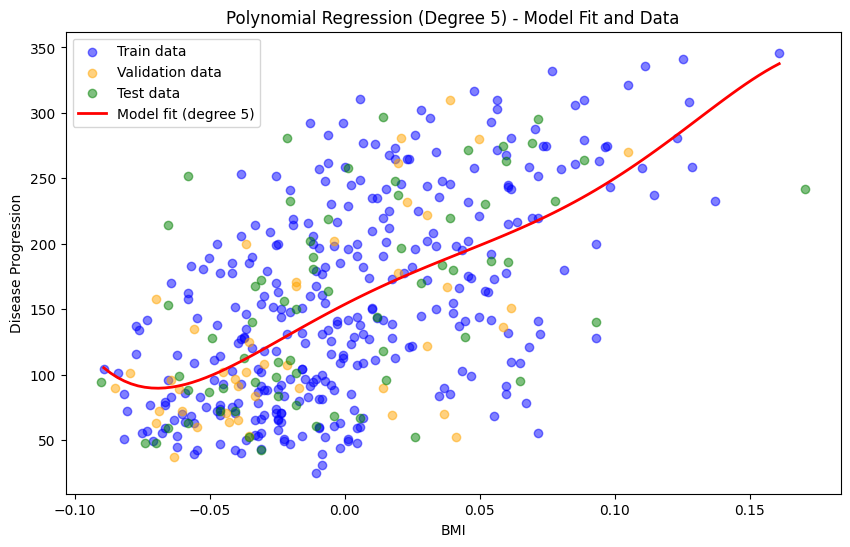

In [72]:
#plotting train, validation, and test data, and model fit
X_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, color='blue', label='Train data', alpha=0.5)
plt.scatter(X_val_bmi, y_val, color='orange', label='Validation data', alpha=0.5)
plt.scatter(X_test_bmi, y_test, color='green', label='Test data', alpha=0.5)
plt.plot(X_range, y_range_pred, color='red', label='Model fit (degree 5)', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression (Degree 5) - Model Fit and Data')
plt.legend()
plt.show()

In [73]:
# coefficients from the best polynomial model(degree 5)
coefficients = model.coef_
intercept = model.intercept_
# polynomial equation
equation = f"y = {intercept:.2f} + "
# Adding each coefficient and its corresponding power of x (BMI)
for i, coef in enumerate(coefficients):
    equation += f"{coef:.2f} * x^{i+1} + " if i < len(coefficients) - 1 else f"{coef:.2f} * x^{i+1}"

print("Equation for best model(degree 5):")
print(equation)
# coefficient of x1 is zero, the first degree term does not significantly affect prediction, 

Equation for best model(degree 5):
y = 153.65 + 0.00 * x^1 + 1059.89 * x^2 + -3824.15 * x^3 + -16770.23 * x^4 + 753722.52 * x^5 + -2993716.57 * x^6


In [74]:
# predicting progression for a given bmi
bmi_value = 30  
bmi_input_df = pd.DataFrame([[bmi_value]], columns=["bmi"])  # converting to data frame to match feature names
bmi_input_poly = poly.transform(bmi_input_df)                # transforming the BMI value into the polynomial feature set
predicted_progression = model.predict(bmi_input_poly)        # predicting using 'model.predict()
print(f"predicted diabetes progression for BMI = {bmi_value}: {predicted_progression[0]:.2f}")

predicted diabetes progression for BMI = 30: -72137253699190.52


In [75]:
# number of trainable parameters for each polynomial degree
trainable_params = {}
for degree in range(6):  
    poly = PolynomialFeatures(degree)  
    X_bmi_poly = poly.fit_transform(X_train_bmi)  # transforming bmi feature
    trainable_params[degree] = len(poly.get_feature_names_out())  # count features  

print("Trainable Parameters for Each Polynomial Degree:")
for degree, params in trainable_params.items():
    print(f"Degree {degree}: {params} parameters")

Trainable Parameters for Each Polynomial Degree:
Degree 0: 1 parameters
Degree 1: 2 parameters
Degree 2: 3 parameters
Degree 3: 4 parameters
Degree 4: 5 parameters
Degree 5: 6 parameters


- Degree 0: 1 parameter which is intercept
- Degree 1: 2 parameters, intercept bmi
- Degree 2: 3 parameters, intercept bmi bmi²
- Degree 3: 4 parameters, intercept bmi bmi² bmi³
- Degree 4: 5 parameters
- Degree 5: 6 parameters


#### __Conclusion__:  

##### __Model performance:__ 
- The polynomial models showed an increasing R² score as degree is increased, which means the higher degree models fit the training set better.
- Degree 5 model performed best on validation data
- But, the test set results for R² says the model's predictive ability is still limited

##### __Model Limitations and Failures:__ 
- High degree models fit the training data a bit too well, capturing noise more than the patterns
- This leads to poor generalisation , which we can observer in the test results.
- The model provided us large negative value for bmi=30, which is unrealistic, showing instability 
- This happens because higher degree polynomials tend to move outside the training range
- In this lab, we only used bmi as the predictor, but the progression is influenced by multiple factors






In [76]:
# polynomial degrees
degrees = [2, 3]
poly_results = []

for degree in degrees:
    # transforming features using PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    # linear regression model training
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    # predictions
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)  
    # metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    poly_results.append([degree, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val])

poly_results_df = pd.DataFrame(poly_results, columns=["Degree", "R² Train", "R² Val", "MAE Train", "MAE Val", "MAPE Train", "MAPE Val"])
print("Polynomial Regression Results:")
print(poly_results_df)

Polynomial Regression Results:
   Degree  R² Train     R² Val  MAE Train     MAE Val  MAPE Train    MAPE Val
0       2  0.604815   0.426319  39.215776   41.802033   34.605710   42.277250
1       3  0.909838 -43.279862  15.650825  241.215317   14.357186  231.212096


In [77]:
# max_depth values for comparison
max_depths = [3, 5]
tree_results = []
for depth in max_depths:
    # decision tree model training
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)  
    # predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)  
    # metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    tree_results.append([depth, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val])

tree_results_df = pd.DataFrame(tree_results, columns=["Max Depth", "R² Train", "R² Val", "MAE Train", "MAE Val", "MAPE Train", "MAPE Val"])
print("Decision Tree Results:")
print(tree_results_df)

Decision Tree Results:
   Max Depth  R² Train    R² Val  MAE Train    MAE Val  MAPE Train   MAPE Val
0          3  0.509503  0.198306  44.259855  48.126248   38.866592  47.672897
1          5  0.686693  0.093919  33.527028  49.645483   29.973625  48.161981


In [78]:
# neighbors values for comparison
n_neighbors_values = [3, 5]
knn_results = []
for n_neighbors in n_neighbors_values:
    # kNN model training
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)  
    #predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val) 
    # metrics
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    knn_results.append([n_neighbors, r2_train, r2_val, mae_train, mae_val, mape_train, mape_val])

knn_results_df = pd.DataFrame(knn_results, columns=["n_neighbors", "R² Train", "R² Val", "MAE Train", "MAE Val", "MAPE Train", "MAPE Val"])
print("kNN Results:")
print(knn_results_df)

kNN Results:
   n_neighbors  R² Train    R² Val  MAE Train    MAE Val  MAPE Train  \
0            3  0.629300  0.214184  37.137966  45.795455   31.597420   
1            5  0.570761  0.358481  40.773414  43.290909   34.976854   

    MAPE Val  
0  44.242144  
1  41.244063  


#### __Conclusion:__  

##### __Polynomial Regression:__ 
The results for degree 2,3 show acceptable performance on the training data, but fail to generalise well on the validation data. Higher degrees resulted in overfitting.

*Limitaions:* Polynomial models may not handle relationships which are complex and also overfitting, with high degrees. The predictions for bmi were high and unrealistic, showing the model instability

##### __Decision Trees:__ 
Trees with max depth 3 showed underfitting, while max depth 5 overfitted the model, and also poor performance on validation data. The results says that the trees require tuning of the depth to balance the bias and variance.

*Limitaions:* Highly sensitive to chosen depth, which leads to both underfitting and overfitting. A deeper tree might capture noise, while a shallow tree might fail to capture the data real complexity

##### __kNN Models:__
The kNN models with 3,5 neighbours performed better on training data but showed moderate performance on validation data. overfitting is expected when there are fewer neighbours or more.

*Limitaions:*  kNN Algorithm heavily depends on neighbours, and its performance might not be upto the mark if the data has noise. 